In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload=files.upload()


Saving forestcleaned.csv to forestcleaned.csv


In [ ]:
df=pd.read_csv('forestcleaned.csv')

In [ ]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df['Classes']=df['Classes'].str.strip()

df['Classes']=np.where(df['Classes']=='not fire',0,1).astype(int)

In [ ]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [ ]:
df.drop(['day','month','year'] ,axis=1,inplace=True)

In [ ]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [ ]:
df.shape

(243, 12)

In [ ]:
## independent and dependent feature sepration

x=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
x.shape

(243, 11)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape

(182, 11)

In [ ]:
## feature selection based on corr
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [ ]:
def multicollinearity (dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr



In [ ]:
corr_feature=multicollinearity(x_train,0.85)

In [ ]:
x_train.drop(corr_feature,axis=1,inplace=True)
x_test.drop(corr_feature,axis=1,inplace=True)

In [ ]:
x_test.shape

(61, 9)

Feature scalling or standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

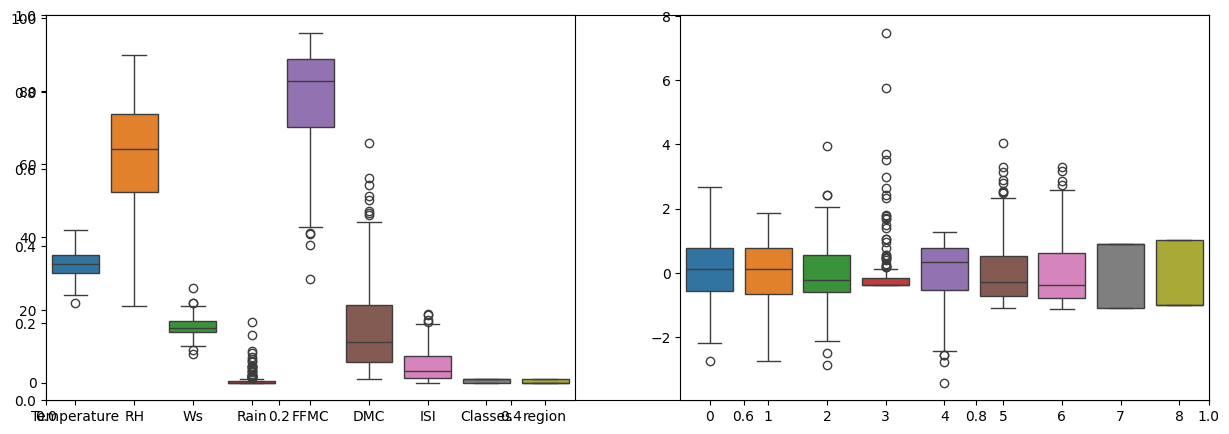

In [ ]:
## box plot to understand scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)

## model training

### linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

regg=LinearRegression()
regg.fit(x_train_scaled,y_train)
y_pred=regg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error ",mae)
print("r2 score ",score)



mean abs error  0.5468236465249986
r2 score  0.9847657384266951


ridge regression

In [ ]:
from sklearn.linear_model import Ridge
regg=Ridge(alpha=1)
regg.fit(x_train_scaled,y_train)
y_pred=regg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error ",mae)
print("r2 score ",score)

mean abs error  0.5642305340105692
r2 score  0.9842993364555513


lasso regression

In [ ]:
from sklearn.linear_model import Lasso
regg=Lasso(alpha=5)
regg.fit(x_train_scaled,y_train)
y_pred=regg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error ",mae)
print("r2 score ",score)

mean abs error  3.907613721675641
r2 score  0.4510607484534582


cross validation lasso


In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
lassocv.alpha_     ##best alpha


np.float64(0.05725391318234408)

In [ ]:
lassocv.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

In [ ]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [ ]:
y_pred=lassocv.predict(x_test_scaled)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error ",mae)
print("r2 score ",score)

mean abs error  0.619970115826343
r2 score  0.9820946715928275


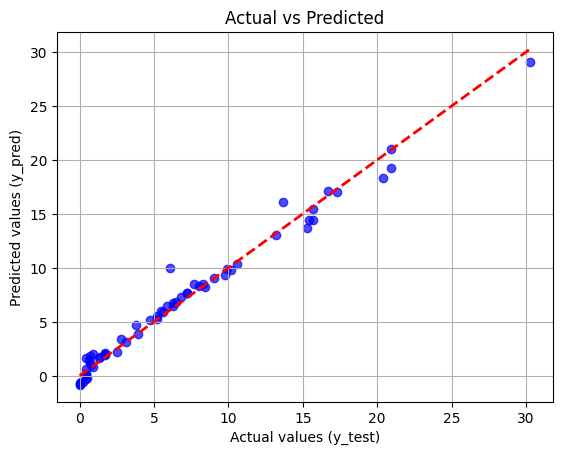

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
lassocv.mse_path_.shape  #100*5 100 ->hyperparameter tunning 5->cv

(100, 5)

**ridge cv**

In [ ]:
from sklearn.linear_model import  RidgeCV
ridgecv=RidgeCV(alphas=[0.1,0.2,0.9,1,10])    #By default, it performs efficient Leave-One-Out Cross-Validatio
ridgecv.fit(x_train_scaled,y_train)
ridgecv.alpha_     ##best alpha

np.float64(1.0)

In [ ]:
ridgecv.alphas

[0.1, 0.2, 0.9, 1, 10]

In [ ]:
ridgecv.coef_     ## ridge never make coeff 0

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

In [ ]:
y_pred=ridgecv.predict(x_test_scaled)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error ",mae)
print("r2 score ",score)

mean abs error  0.5642305340107913
r2 score  0.9842993364555519


elastic net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error ",mae)
print("r2 score ",score)
print("coeff",elastic.coef_)

mean abs error  1.8822353634896005
r2 score  0.8753460589519703
coeff [ 0.21700498 -0.46785751  0.         -0.          0.37217213  2.36758116
  2.35779601  0.87026661  0.        ]


elastic cv

In [ ]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(cv=5, l1_ratio=[.1, .5, .7, .9, 1], random_state=42)
model.fit(x_train_scaled, y_train)

print("Best alpha:", model.alpha_)
print("Best l1_ratio:", model.l1_ratio_)


Best alpha: 0.04311146156383891
Best l1_ratio: 0.5


𝛼
α controls overall strength of regularization

𝜌
ρ (called l1_ratio in scikit-learn) controls the mix between L1 and L2:

l1_ratio = 1 → pure Lasso

l1_ratio = 0 → pure Ridge

0 < l1_ratio < 1 → ElasticNet



pickling the machine learniing model and preprocessing model standard scaler

In [ ]:
scaler

StandardScaler()

In [ ]:
ridgecv

RidgeCV(alphas=[0.1, 0.2, 0.9, 1, 10])

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgecv,open('ridgecv.pkl','wb'))

In [ ]:
from google.colab import files
files.download('scaler.pkl')
files.download('ridgecv.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>